## Observations and Insights 

%matplotlib notebook

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#display mouse_metadata
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
#display study_results
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
merge_df.head(25)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [4]:
# Checking the number of mice.
#merge_df["Mouse ID"].value_counts()
number_mouse = int(len(merge_df["Mouse ID"].value_counts()))
print(f" The number of mice in this study is {number_mouse}")

 The number of mice in this study is 249


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = merge_df[merge_df.duplicated(subset = ['Mouse ID','Timepoint'], keep = False)]
duplicate_ID = duplicate_df["Mouse ID"].unique()
duplicate_ID

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_df[merge_df["Mouse ID"]!='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df["Mouse ID"]!='g989']
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
# clean_df.groupby(level=[0]).count()
number_mouse = int(len(clean_df["Mouse ID"].value_counts()))

print(f"The number of Mice ID in clean DataFrame is {number_mouse}")

The number of Mice ID in clean DataFrame is 248


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

by_drug_df = clean_df.groupby(['Drug Regimen'])
by_drug_df.head()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor     = by_drug_df["Tumor Volume (mm3)"].mean()
median_tumor   = by_drug_df["Tumor Volume (mm3)"].median()
variance_tumor = by_drug_df["Tumor Volume (mm3)"].var()
stdstdev_tumor = by_drug_df["Tumor Volume (mm3)"].std()
SEM_tumor      = by_drug_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame( { 
                            "Mean"         : mean_tumor,
                            "Median"       : median_tumor,
                            "Variance"     : variance_tumor,
                            "Standard Dev" : stdstdev_tumor,
                            "SEM"          : SEM_tumor
                            })
summary_df

,Mean,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
           
summary_agg_df = clean_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

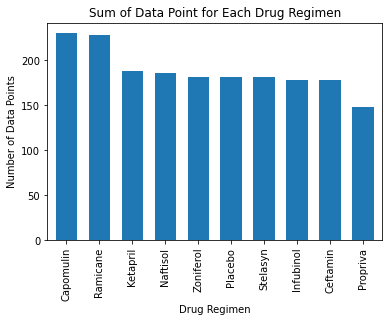

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_plot_regimen = clean_df['Drug Regimen'].value_counts().plot(kind = "bar",width = 0.65)
bar_plot_regimen.set_xlabel("Drug Regimen")
bar_plot_regimen.set_ylabel("Number of Data Points")
bar_plot_regimen.set_title("Sum of Data Point for Each Drug Regimen")
plt.show()

Text(0, 0.5, 'Number of Data Points')

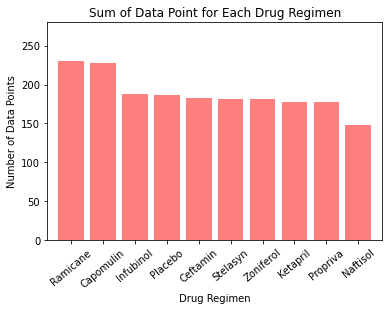

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugs = clean_df["Drug Regimen"].value_counts()
x_axis = np.arange(len(drugs))
plt.bar(x_axis, drugs, color = 'r', alpha = 0.5, align = "center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, merge_df["Drug Regimen"].unique(), rotation = 40)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(drugs)+50)
plt.title("Sum of Data Point for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

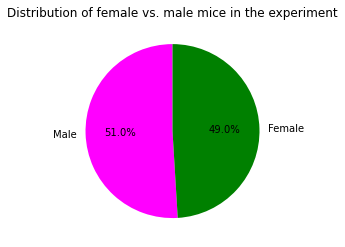

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
bar_plot_regimen = clean_df['Sex'].value_counts().plot(kind = "pie", colors = ["magenta","green"], ylabel = '', autopct='%1.1f%%', figsize=(4, 4), startangle=90)
bar_plot_regimen.set_title("Distribution of female vs. male mice in the experiment")
plt.show()


Text(0.5, 1.0, 'Distribution of female vs. male mice in the experiment')

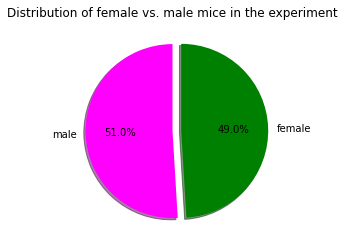

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_data = clean_df['Sex'].value_counts()
explode = (0, 0.1)
plt.pie(sex_data, labels= ('male', 'female'),explode =explode, colors=("magenta", "green"), autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Distribution of female vs. male mice in the experiment")


## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse, 
#Note: it is not 45, some mice only lived till 20, 30, 35 etc

drug_type = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
drug_type_df = pd.DataFrame()

for drug in drug_type:
    row = clean_df.loc[clean_df["Drug Regimen"] == drug, :]
    drug_type_df = drug_type_df.append(row)
#drug_type_df

maxtime_df = drug_type_df.groupby(['Drug Regimen', 'Mouse ID']).max()['Timepoint']
#maxtime_df.head()

maxtime_drug_merge_df = pd.merge(maxtime_df, clean_df, on = ("Mouse ID", "Timepoint"), how = "left")
#maxtime_drug_merge_df

In [32]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Capomulin#

# Locate the rows which contain mice on each drug and get the tumor volumes
capomulin_df = maxtime_drug_merge_df.loc[maxtime_drug_merge_df["Drug Regimen"] == "Capomulin",:]
# add subset 
capomulin_quartiles = capomulin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
capomulin_lowerQ = capomulin_quartiles[0.25]
capomulin_upperQ = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperQ-capomulin_lowerQ
capomulin_lowerbound = capomulin_lowerQ - (1.5*capomulin_iqr)
capomulin_upperbound = capomulin_upperQ + (1.5*capomulin_iqr) 

print(f' The lower quartile for Capomulin is {round(capomulin_lowerQ, 2)}')
print(f' The upper quartile for Capomulin is {round(capomulin_upperQ, 2)}')
print(f' The lower bound for Capomulin is {round(capomulin_lowerbound, 2)}')
print(f' The upper bound for Capomulin is {round(capomulin_upperbound, 2)}')
print(f' The IQR for Capomulin is {round(capomulin_iqr, 2)}')  

# Determine outliers using upper and lower bounds
capomulin_outliers = capomulin_df.loc[(capomulin_df["Tumor Volume (mm3)"] < capomulin_lowerbound) | 
                                      (capomulin_df["Tumor Volume (mm3)"] > capomulin_upperbound), :]

print(f'There are {capomulin_outliers["Mouse ID"].count()} outliers for Capomulin')

 The lower quartile for Capomulin is 32.38
 The upper quartile for Capomulin is 40.16
 The lower bound for Capomulin is 20.7
 The upper bound for Capomulin is 51.83
 The IQR for Capomulin is 7.78
There are 0 outliers for Capomulin


In [33]:
#Ramicane#

# Locate the rows which contain mice on each drug and get the tumor volumes
ramicane_df = maxtime_drug_merge_df.loc[maxtime_drug_merge_df["Drug Regimen"] == "Ramicane",:]
# add subset 
ramicane_quartiles = ramicane_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
ramicane_lowerQ = ramicane_quartiles[0.25]
ramicane_upperQ = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperQ-ramicane_lowerQ
ramicane_lowerbound = ramicane_lowerQ - (1.5*ramicane_iqr)
ramicane_upperbound = ramicane_upperQ + (1.5*ramicane_iqr) 

# Determine outliers using upper and lower bounds
ramicane_outliers = ramicane_df.loc[(ramicane_df["Tumor Volume (mm3)"] < ramicane_lowerbound) | 
                                      (ramicane_df["Tumor Volume (mm3)"] > ramicane_upperbound), :]


print(f' The lower quartile for Ramicane is {round(ramicane_lowerQ, 2)}')
print(f' The upper quartile for Ramicane is {round(ramicane_upperQ, 2)}')
print(f' The lower bound for Ramicane is {round(ramicane_lowerbound, 2)}')
print(f' The upper bound for Ramicane is {round(ramicane_upperbound, 2)}')
print(f' The IQR for Ramicane is {round(ramicane_iqr, 2)}')  
print(f' There are {ramicane_outliers["Mouse ID"].count()} outliers for Ramicane')

 The lower quartile for Ramicane is 31.56
 The upper quartile for Ramicane is 40.66
 The lower bound for Ramicane is 17.91
 The upper bound for Ramicane is 54.31
 The IQR for Ramicane is 9.1
 There are 0 outliers for Ramicane


In [34]:
#Infubinol#
Infubinol_df= maxtime_drug_merge_df.loc[maxtime_drug_merge_df["Drug Regimen"] == "Infubinol", :]
Infubinol_quartiles = Infubinol_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
Infubinol_lowerQ= Infubinol_quartiles[0.25]
Infubinol_upperQ = Infubinol_quartiles[0.75]
Infubinol_iqr = Infubinol_upperQ - Infubinol_lowerQ
# Determine outliers using upper and lower bounds
Infubinol_lowerbound = Infubinol_lowerQ - (1.5*Infubinol_iqr)
Infubinol_upperbound = Infubinol_upperQ + (1.5*Infubinol_iqr) 

# Determine outliers using upper and lower bounds
Infubinol_outliers = Infubinol_df.loc[(Infubinol_df["Tumor Volume (mm3)"] < Infubinol_lowerbound) | 
                                      (Infubinol_df["Tumor Volume (mm3)"] > Infubinol_upperbound), :]


print(f' The lower quartile for Infubinol is {round(Infubinol_lowerQ, 2)}')
print(f' The upper quartile for Infubinol is {round(Infubinol_upperQ, 2)}')
print(f' The lower bound for Infubinol is {round(Infubinol_lowerbound, 2)}')
print(f' The upper bound for Infubinol is {round(Infubinol_upperbound, 2)}')
print(f' The IQR for Infubinol is {round(Infubinol_iqr, 2)}')  
print(f' There are {Infubinol_outliers["Mouse ID"].count()} outliers for Infubinol')

 The lower quartile for Infubinol is 54.05
 The upper quartile for Infubinol is 65.53
 The lower bound for Infubinol is 36.83
 The upper bound for Infubinol is 82.74
 The IQR for Infubinol is 11.48
 There are 1 outliers for Infubinol


In [35]:
#Infubinol#
Ceftamin_df= maxtime_drug_merge_df.loc[maxtime_drug_merge_df["Drug Regimen"] == "Ceftamin", :]
Ceftamin_quartiles = Ceftamin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
Ceftamin_lowerQ= Ceftamin_quartiles[0.25]
Ceftamin_upperQ = Ceftamin_quartiles[0.75]
Ceftamin_iqr = Ceftamin_upperQ - Ceftamin_lowerQ
# Determine outliers using upper and lower bounds
Ceftamin_lowerbound = Ceftamin_lowerQ - (1.5*Ceftamin_iqr)
Ceftamin_upperbound = Ceftamin_upperQ + (1.5*Ceftamin_iqr) 

# Determine outliers using upper and lower bounds
Ceftamin_outliers = Ceftamin_df.loc[(Ceftamin_df["Tumor Volume (mm3)"] < Ceftamin_lowerbound) | 
                                      (Ceftamin_df["Tumor Volume (mm3)"] > Ceftamin_upperbound), :]

print(f' The lower quartile for Ceftamin is {round(Ceftamin_lowerQ, 2)}')
print(f' The upper quartile for Ceftamin is {round(Ceftamin_upperQ, 2)}')
print(f' The lower bound for Ceftamin is {round(Ceftamin_lowerbound, 2)}')
print(f' The upper bound for Ceftamin is {round(Ceftamin_upperbound, 2)}')
print(f' The IQR for Ceftamin is {round(Ceftamin_iqr, 2)}') 
print(f' There are {Ceftamin_outliers["Mouse ID"].count()} outliers for Ceftamin')

 The lower quartile for Ceftamin is 48.72
 The upper quartile for Ceftamin is 64.3
 The lower bound for Ceftamin is 25.36
 The upper bound for Ceftamin is 87.67
 The IQR for Ceftamin is 15.58
 There are 0 outliers for Ceftamin


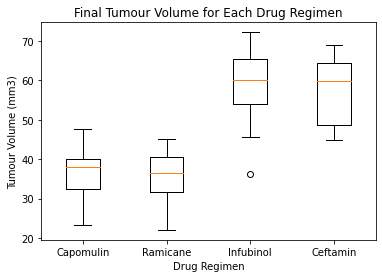

In [36]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_data = [capomulin_df['Tumor Volume (mm3)'], 
                ramicane_df['Tumor Volume (mm3)'], 
                Infubinol_df['Tumor Volume (mm3)'], 
                Ceftamin_df['Tumor Volume (mm3)']]
boxplot_data
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumour Volume for Each Drug Regimen")
ax1.set_ylabel("Tumour Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(boxplot_data, labels = drug_type, widths = 0.4, vert = True)
plt.show()

## Line and Scatter Plots

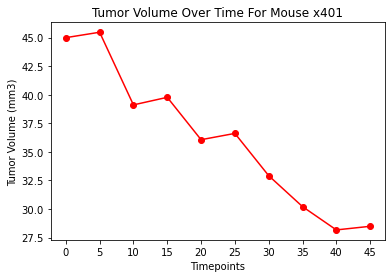

In [37]:
#Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Generate df with data a mouse which was treated with Capomulin
capomulin = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin", :]

#Picked a mouse with ID = x401
x401_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") & (clean_df["Mouse ID"] =="x401"),:]

plt.plot(x401_df['Timepoint'], x401_df["Tumor Volume (mm3)"], ls = '-', marker = 'o', color = 'red')
plt.title('Tumor Volume Over Time For Mouse x401')
plt.xlabel('Timepoints')
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(x401_df['Timepoint'])
plt.show()

Text(0, 0.5, 'Avarage Tumour Volume (mm3)')

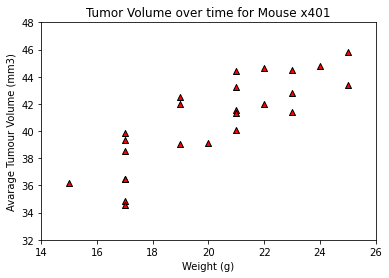

In [38]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin",:]
capomulin_data
# #Find average tumour volume per mouse and put into dataframe
capomulin_avg = capomulin_data.groupby('Mouse ID').mean()
x_value = capomulin_avg['Weight (g)']
y_value = capomulin_avg['Tumor Volume (mm3)']
plt.scatter(x_value, y_value, marker = '^', color = 'red', edgecolors="black")
plt.xlim(14, 26)
plt.ylim(32, 48)
plt.title('Tumor Volume over time for Mouse x401')
plt.xlabel('Average Tumor Volume (mm3) vs. Mouse Weight for Capomulin treatment ')
plt.xlabel("Weight (g)")
plt.ylabel("Avarage Tumour Volume (mm3)")

## Correlation and Regression

The correlation between mice weight and average tumour volume is ~ 0.84
The r-squared value is 0.7088568047708723


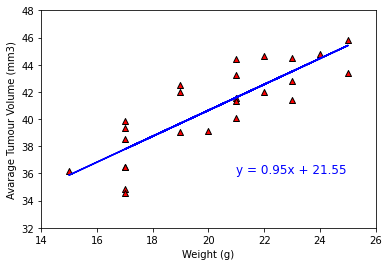

In [39]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volumefor the Capomulin regimen
x_value = capomulin_avg['Weight (g)']
y_value = capomulin_avg['Tumor Volume (mm3)']

##Correlation coefficient
corr_coeff = st.pearsonr(x_value, y_value)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
reg_line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value, marker="^", color = "red", edgecolors = "black")
plt.plot(x_value, regress_values,"b")
plt.annotate(reg_line_equation,(21,36),fontsize = 12,color = "blue")
plt.xlim(14, 26)
plt.ylim(32, 48)
plt.xlabel("Weight (g)")
plt.ylabel("Avarage Tumour Volume (mm3)")

print(f'The correlation between mice weight and average tumour volume is ~ {round(corr_coeff[0],2)}')
print(f'The r-squared value is {rvalue**2}')